k-mean

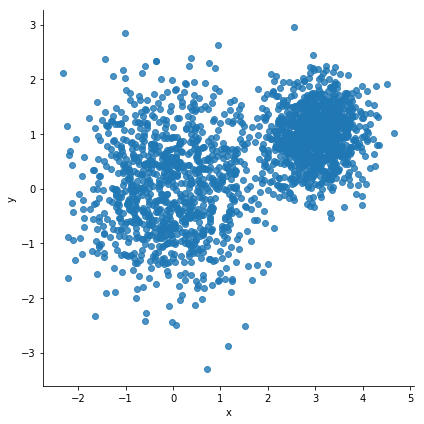

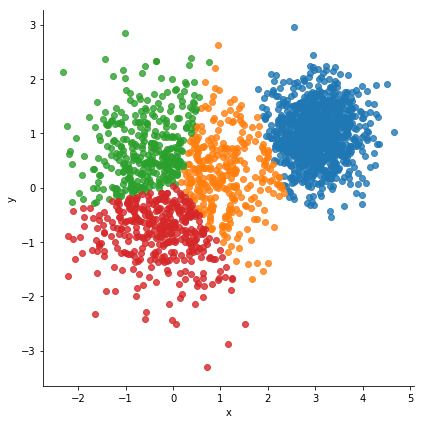

In [20]:
import numpy as np

num_points = 2000
vectors_set = []

for i in xrange(num_points):
    if np.random.random() > 0.5 :
        vectors_set.append([np.random.normal(0.0,0.9),np.random.normal(0.0,0.9)])
    else :
        vectors_set.append([np.random.normal(3.0,0.5),np.random.normal(1.0,0.5)])
#난수 생성

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.DataFrame({"x":[v[0] for v in vectors_set],"y":[v[1] for v in vectors_set]})
sns.lmplot("x","y",data = df, fit_reg = False, size = 6)
plt.show()
#난수 그리기

import tensorflow as tf

vectors = tf.constant(vectors_set)
k = 4
centroides = tf.Variable(tf.slice(tf.random_shuffle(vectors),[0,0],[k,-1]))
#초기 중심값 설정

expanded_vectors = tf.expand_dims(vectors,0)
expanded_centroides = tf.expand_dims(centroides,1)
#둘다 3차원으로 확장, vector는 D0를 추가, centroid는 D1을 추가

assignments = tf.argmin(tf.reduce_sum(tf.square(tf.subtract(expanded_vectors,expanded_centroides)),2),0)
means = tf.concat([tf.reduce_mean(tf.gather(vectors,tf.reshape(tf.where(tf.equal(assignments,c)),[1,-1])),reduction_indices = [1]) for c in xrange(k)],0)
#tf.argmin이 최소값을 리턴한다. 즉 제곱합이 가장 적은 새로운 중심값이 리턴되는것이다.

update_centroides = tf.assign(centroides,means)

init_op = tf.initialize_all_variables()

sess = tf.Session()
sess.run(init_op)

for step in xrange(100):
    _,centroid_values,assignment_values = sess.run([update_centroides,centroides,assignments])
    
data = {"x" :[],"y":[],"cluster":[]}

for i in xrange(len(assignment_values)):
    data["x"].append(vectors_set[i][0])
    data["y"].append(vectors_set[i][1])
    data["cluster"].append(assignment_values[i])
    
df = pd.DataFrame(data)
sns.lmplot("x","y",data = df,fit_reg = False,size = 6,hue = "cluster",legend = False)
plt.show()

In [21]:
centroides.get_shape()

TensorShape([Dimension(4), Dimension(2)])